# **CS 470 DL Tutorial**
#### 1) Google Collab Tutorial (How to use)  
#### 2) PyTorch Tutorial   

    


#### **1) Google Colab Tutorial**

In [46]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day


86400

## 1.1 Overview of Colaboratory

In [47]:
var = 1
name = 'NTU'
print(name)

NTU


$\sqrt{3x-1}+(1+x)^2$

In [48]:
import time
print("Sleeping")
time.sleep(30) # sleep for a while; interrupt me!
print("Done Sleeping")

Sleeping
Done Sleeping


## System aliases

Jupyter includes shortcuts for common operations, such as ls:

In [49]:
!ls /bin

bash	       hostname       su
bunzip2        journalctl     sync
bzcat	       kill	      systemctl
bzcmp	       kmod	      systemd
bzdiff	       less	      systemd-ask-password
bzegrep        lessecho       systemd-escape
bzexe	       lessfile       systemd-hwdb
bzfgrep        lesskey	      systemd-inhibit
bzgrep	       lesspipe       systemd-machine-id-setup
bzip2	       ln	      systemd-notify
bzip2recover   login	      systemd-sysusers
bzless	       loginctl       systemd-tmpfiles
bzmore	       ls	      systemd-tty-ask-password-agent
cat	       lsblk	      tar
chgrp	       lsmod	      tempfile
chmod	       mkdir	      touch
chown	       mknod	      true
cp	       mktemp	      udevadm
dash	       more	      ulockmgr_server
date	       mount	      umount
dd	       mountpoint     uname
df	       mv	      uncompress
dir	       networkctl     vdir
dmesg	       nisdomainname  wdctl
dnsdomainname  pidof	      which
domainname     ps	      ypdomainname
echo	       pwd	      zcat
egrep	     

In [50]:
# In https://github.com/ipython/ipython/pull/10545, single quote strings are ignored
message = 'Colaboratory is great!'
foo = !unset message && echo -e '{message}\n{message}\n'$message"\n$message"
foo

['Colaboratory is great!',
 'Colaboratory is great!',
 'Colaboratory is great!',
 'Colaboratory is great!']

# Integration with Drive


## 1.3 Snippets: Importing libraries

# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [51]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
!apt-get -qq install -y libfluidsynth1

Install 7zip reader libarchive

In [53]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Install GraphViz & PyDot


In [54]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##1.4  Using Google Colab with GitHub

## How to get an access to the assignment (github)
- Navigate to http://colab.research.google.com/github.
- Enter a github url as https://github.com/pidipidi/CS470_IAI_2022Fall
- Click the "Include Private Repos" checkbox.
- In the popup window, sign-in to your Github account and authorize Colab to read the private files.
- Your private repositories and notebooks will now be available via the github navigation pane.


## 1.5 Enabling and testing the GPU

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

Next, we'll confirm that we can connect to the GPU with pytorch:

In [55]:
import torch 
torch.cuda.is_available()
torch.cuda.device_count()
torch.cuda.current_device()
torch.cuda.device(0)
torch.cuda.get_device_name(0)

'Tesla T4'

#### **2) PyTorch Tutorial**

In [56]:
import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

In [57]:
# ================================================================== #
#                    1. Basic autograd example 1                     #
# ================================================================== #
# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)
# required _grad explaination verbally

# Create tensors directly from data 

data = [[9, 8],[7, 2]]
x_data = torch.tensor(data)
# Create tensors directly from numpy arrays

np_array = np.array(data)
x_np = torch.from_numpy(np_array)
# Build a computational graph.
y = w * x + b    # y = 2 * x + 3
print(y)

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 


tensor(5., grad_fn=<AddBackward0>)
tensor(2.)
tensor(1.)
tensor(1.)


In [58]:
# ================================================================== #
#                    2. Basic autograd example 2                     #
# ================================================================== #
x = torch.randn(10, 3)
y = torch.randn(10, 2)
# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)


# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

w:  Parameter containing:
tensor([[ 0.2191,  0.0953,  0.0384],
        [-0.0116,  0.3190, -0.4110]], requires_grad=True)
b:  Parameter containing:
tensor([ 0.2131, -0.2687], requires_grad=True)
loss:  1.4316654205322266
dL/dw:  tensor([[-0.0641, -0.0683,  0.5360],
        [ 0.3997, -0.0362, -0.9775]])
dL/db:  tensor([ 0.6553, -0.7694])
loss after 1 step optimization:  1.4316654205322266


In [59]:

# ================================================================== #
#                         3. Input pipeline                           #
# ================================================================== #

# Download and construct CIFAR-10 dataset.
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True, 
                                             transform=transforms.ToTensor(),
                                             download=True)

# Fetch one data pair (read data from disk).
image, label = train_dataset[0]
print (image.size())
print (label)

# Data loader (this provides queues and threads in a very simple way).
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

# When iteration starts, queue and thread start to load data from files.
data_iter = iter(train_loader)

# Mini-batch images and labels.
images, labels = data_iter.next()

# Actual usage of the data loader is as below.
for images, labels in train_loader:
    # Training code should be written here.
    pass

Files already downloaded and verified
torch.Size([3, 32, 32])
6


In [60]:
# ================================================================== #
#                        4. Pretrained model                         #
# ================================================================== #

# Download and load the pretrained densenet.
model = torchvision.models.resnet18(pretrained=True)
# If you want to finetune only the top layer of the model, set as below.
for param in model.parameters():
    param.requires_grad = False

# Replace the top layer for finetuning.
model.fc = nn.Linear(model.fc.in_features, 100)  # 100 is an example.

# Forward pass.
images = torch.randn(64, 3, 224, 224)
outputs = model(images)
print (outputs.size())     # (64, 100)



/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

torch.Size([64, 100])


In [61]:
# ================================================================== #
#                      5. Save and load the model                    #
# ================================================================== #

# Save and load the entire model.
torch.save(model, 'model.ckpt')
model = torch.load('model.ckpt')

# Save and load only the model parameters (recommended).
torch.save(model.state_dict(), 'params.ckpt')
model.load_state_dict(torch.load('params.ckpt'))

<All keys matched successfully>

Epoch [5/60], Loss: 13.9279
Epoch [10/60], Loss: 5.7481
Epoch [15/60], Loss: 2.4344
Epoch [20/60], Loss: 1.0919
Epoch [25/60], Loss: 0.5480
Epoch [30/60], Loss: 0.3277
Epoch [35/60], Loss: 0.2384
Epoch [40/60], Loss: 0.2022
Epoch [45/60], Loss: 0.1875
Epoch [50/60], Loss: 0.1816
Epoch [55/60], Loss: 0.1792
Epoch [60/60], Loss: 0.1782


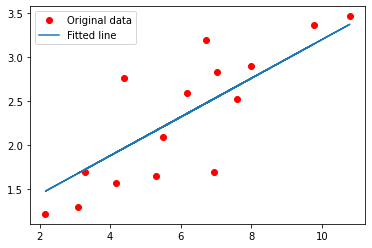

In [62]:
# ================================================================== #
#                      6. Linear Regression                          #
# ================================================================== #
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')